<a href="https://colab.research.google.com/github/nkr9/Data-Analyst/blob/main/Used_Cars_Market_Analysis_Data_from_Cars24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Used Cars Market Analysis:Data from Cars24

Importing necessary libraries


In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

Datasets's info



In [29]:
cars_df = pd.read_csv('/content/cars24data.csv')
cars_df.head()

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


In [30]:
cars_df.tail()


,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
1440,2021 Maruti Ertiga VXI SHVS,862000,2021,1462,No,Manual,19901,1,Petrol,1,0
1441,2015 Maruti Ciaz ZXI,507000,2015,1373,No,Manual,50022,1,Petrol,5,2
1442,2019 Maruti Baleno DELTA PETROL 1.2,554000,2019,1197,Yes,Manual,58679,1,Petrol,24,4
1443,2017 Maruti Ciaz S 1.4 MT PETROL,557000,2017,1373,Yes,Manual,73948,2,Petrol,4,5
1444,2012 Maruti Wagon R 1.0 LXI,256000,2012,998,No,Manual,55994,1,Petrol,20,9


In [31]:
cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


We can see that there are no missing values. Also, the dataset has 7 numerical columns and 4 categorical. We can already delete the 'Model Name' column since it probably doesn't affect the price. And it'll be nearly impossible to encode all these values.

In [32]:
cars_df.describe()

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts
count,1.445000e+03,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,5.263543e+05,2017.817301,1142.104498,50588.903114,1.285121,9.597232,3.228374
std,1.963696e+05,2.986554,169.020818,27339.562631,0.489877,8.398637,3.364578
min,1.390000e+05,2010.000000,796.000000,1207.000000,1.000000,0.000000,0.000000
25%,3.900000e+05,2016.000000,998.000000,28803.000000,1.000000,3.000000,0.000000
50%,5.010000e+05,2018.000000,1197.000000,47849.000000,1.000000,8.000000,2.000000
75%,6.310000e+05,2020.000000,1197.000000,70337.000000,2.000000,14.000000,5.000000
max,1.599000e+06,2023.000000,1462.000000,124716.000000,3.000000,43.000000,27.000000


In [33]:
cars_df.isnull().sum()


,0
Model Name,0
Price,0
Manufacturing_year,0
Engine capacity,0
Spare key,0
Transmission,0
KM driven,0
Ownership,0
Fuel type,0
Imperfections,0


In [34]:
cars_df.duplicated().sum()


np.int64(0)

In [35]:
cars_df.dtypes


,0
Model Name,object
Price,int64
Manufacturing_year,int64
Engine capacity,int64
Spare key,object
Transmission,object
KM driven,int64
Ownership,int64
Fuel type,object
Imperfections,int64


In [45]:
correlation_matrix = cars_df.corr(numeric_only=True)
correlation_matrix

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts
Price,1.000000,0.615077,0.718906,-0.308925,-0.193696,-0.245968,-0.207350
Manufacturing_year,0.615077,1.000000,0.128797,-0.529817,-0.217609,-0.326156,-0.256837
Engine capacity,0.718906,0.128797,1.000000,0.017436,-0.075150,-0.034947,-0.015830
KM driven,-0.308925,-0.529817,0.017436,1.000000,0.183771,0.266018,0.249148
Ownership,-0.193696,-0.217609,-0.075150,0.183771,1.000000,0.039040,0.066348
Imperfections,-0.245968,-0.326156,-0.034947,0.266018,0.039040,1.000000,0.426276
Repainted Parts,-0.207350,-0.256837,-0.015830,0.249148,0.066348,0.426276,1.000000


In [50]:
cars_df.shape


(1445, 11)

In [52]:
cars_df.columns


Index(['Model Name', 'Price', 'Manufacturing_year', 'Engine capacity',
       'Spare key', 'Transmission', 'KM driven', 'Ownership', 'Fuel type',
       'Imperfections', 'Repainted Parts'],
      dtype='object')

# Data Visualizations


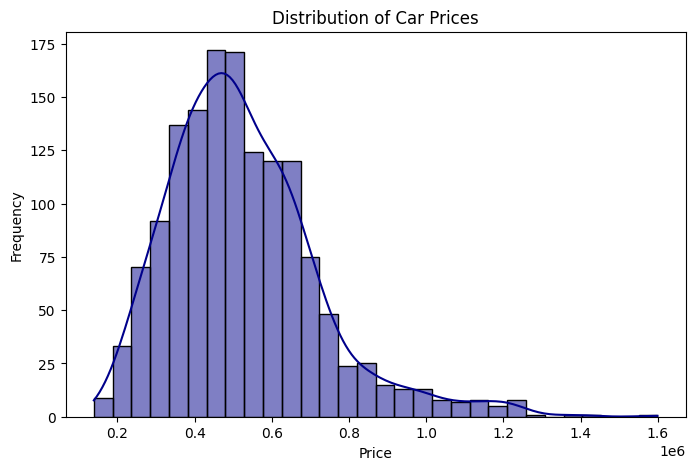

In [53]:
plt.figure(figsize=(8, 5))
sns.histplot(cars_df['Price'], bins=30, kde=True, color='darkblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Car Price Distribution by Manufacturing Year

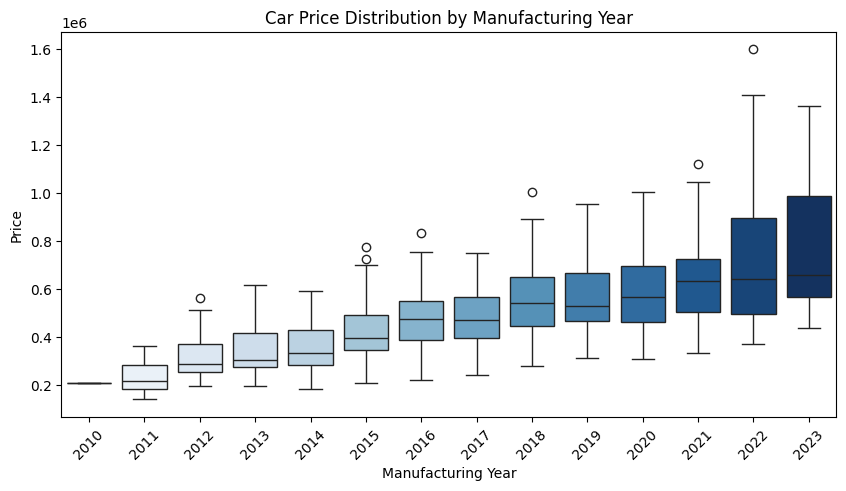

In [64]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Manufacturing_year', y='Price', hue='Manufacturing_year',
            data=cars_df, palette='Blues', legend=False)
plt.xticks(rotation=45)
plt.title('Car Price Distribution by Manufacturing Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price')
plt.show()

# Price vs. Engine Capacity

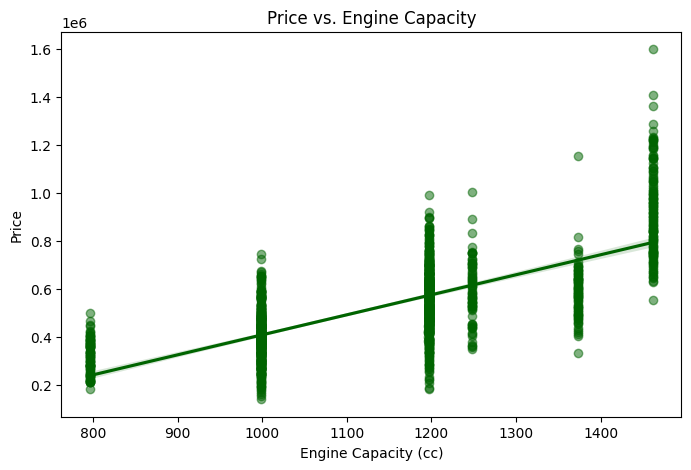

In [58]:
plt.figure(figsize=(8, 5))
sns.regplot(x=cars_df['Engine capacity'], y=cars_df['Price'], scatter_kws={'alpha':0.5}, color='darkgreen')
plt.title('Price vs. Engine Capacity')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Price')
plt.show()

# Count of Manual vs. Automatic Cars

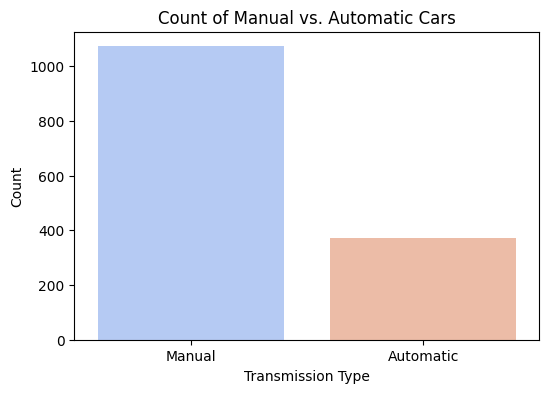

In [65]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Transmission', hue='Transmission', data=cars_df,
              palette='coolwarm', legend=False)
plt.title('Count of Manual vs. Automatic Cars')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

# Price vs. KM Driven

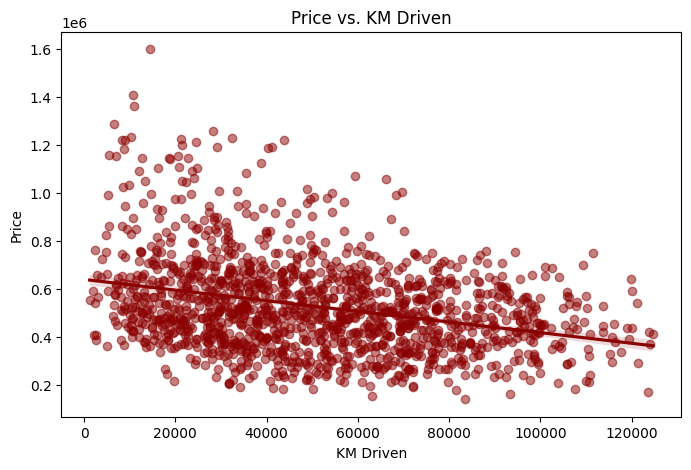

In [62]:
plt.figure(figsize=(8, 5))
sns.regplot(x=cars_df['KM driven'], y=cars_df['Price'], scatter_kws={'alpha':0.5}, color='darkred')
plt.title('Price vs. KM Driven')
plt.xlabel('KM Driven')
plt.ylabel('Price')
plt.show()

# Ownership Type Distribution

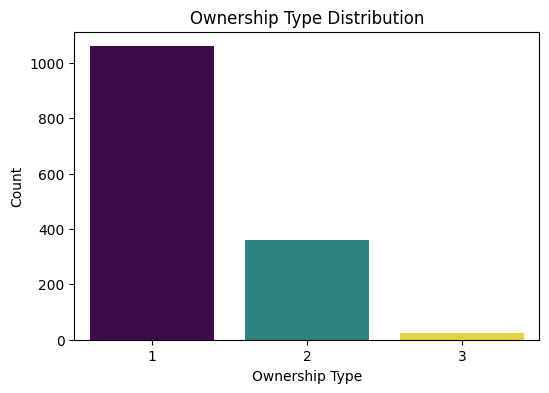

In [66]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Ownership', hue='Ownership', data=cars_df,
              palette='viridis', legend=False)
plt.title('Ownership Type Distribution')
plt.xlabel('Ownership Type')
plt.ylabel('Count')
plt.show()

# Price Distribution Across Fuel Types

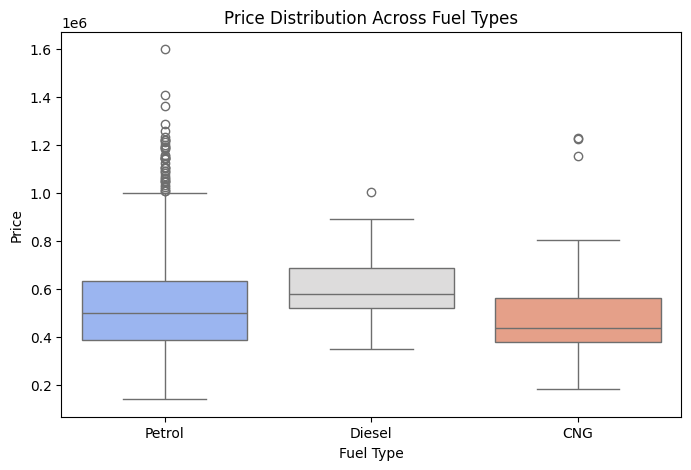

In [69]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel type', y='Price', hue='Fuel type',
            data=cars_df, palette='coolwarm', legend=False)
plt.title('Price Distribution Across Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

# Count of Different Imperfections

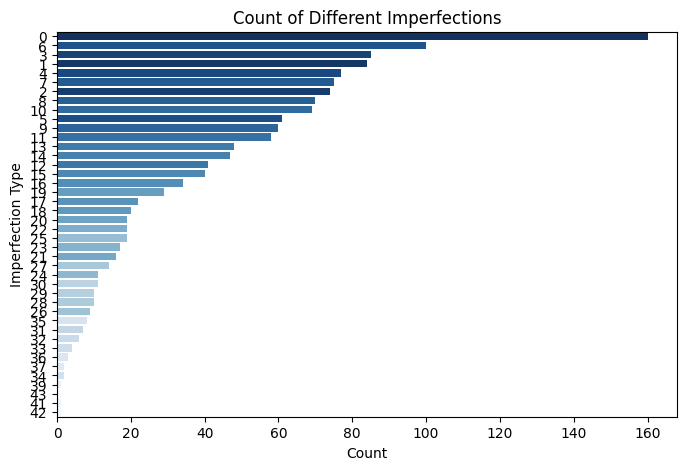

In [71]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Imperfections', hue='Imperfections',
              data=cars_df, order=cars_df['Imperfections'].value_counts().index,
              palette='Blues_r', legend=False)
plt.title('Count of Different Imperfections')
plt.xlabel('Count')
plt.ylabel('Imperfection Type')
plt.show()

# Proportion of Cars with Repainted Parts

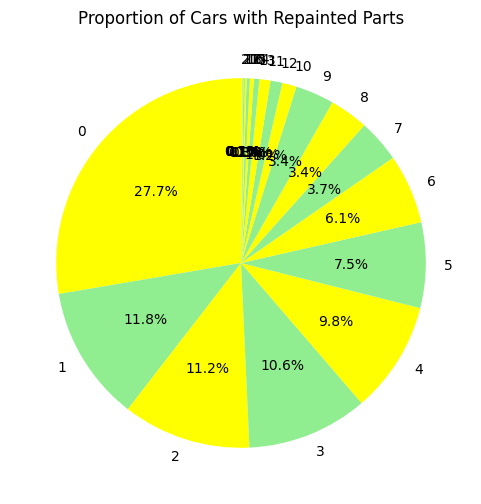

In [76]:
plt.figure(figsize=(6, 6))
cars_df['Repainted Parts'].value_counts().plot.pie(autopct='%1.1f%%', colors=['yellow', 'lightgreen'], startangle=90)
plt.title('Proportion of Cars with Repainted Parts')
plt.ylabel('')
plt.show()

# Predictive modeling

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBRegressor

In [89]:
cars_df.fillna(cars_df.median(numeric_only=True), inplace=True)  # Fill numeric with median
cars_df.fillna(cars_df.mode().iloc[0], inplace=True)

# Encode categorical columns


In [90]:
cat_cols = ['Model Name', 'Spare key', 'Transmission', 'Ownership', 'Fuel type', 'Imperfections', 'Repainted Parts']
le = LabelEncoder()
for col in cat_cols:
    cars_df[col] = le.fit_transform(cars_df[col])

# Select features and target

In [91]:
X = cars_df.drop(columns=['Price'])  # Independent variables
y = cars_df['Price']

# Train-test split (80-20)


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
scaler = StandardScaler()
X_train[['Engine capacity', 'KM driven', 'Manufacturing_year']] = scaler.fit_transform(X_train[['Engine capacity', 'KM driven', 'Manufacturing_year']])
X_test[['Engine capacity', 'KM driven', 'Manufacturing_year']] = scaler.transform(X_test[['Engine capacity', 'KM driven', 'Manufacturing_year']])


In [96]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "KNN Algorithm": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes Classifier": GaussianNB(),
    "Support Vector Classifier": SVC(kernel='rbf', random_state=42)
}

# Train models and evaluate


In [97]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {"R² Score": r2, "MAE": mae}

# Display results


In [98]:
results_cars_df = pd.DataFrame(results).T
print(results_cars_df)

                           R² Score            MAE
Linear Regression          0.803813   61020.224527
Decision Tree              0.803520   57910.034602
Random Forest              0.862652   47078.581315
XGBoost                    0.864392   46320.285156
KNN Algorithm              0.311765  105474.048443
Naive Bayes Classifier     0.410767  100955.017301
Support Vector Classifier  0.061192  129359.861592


In [99]:
models = ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost","KNN Algorithm","Naive Bayes","SVM"]
r2_scores = [0.803813, 0.803520, 0.862652, 0.864392,0.311765,0.410767,0.061192]
mae_values = [61020.22, 57910.03, 47078.58, 46320.28,105474.04,100955.01,129359.86]

# Convert R² scores to percentages

In [100]:
r2_percent = [r * 100 for r in r2_scores]

# Normalize MAE to percentage (lower is better, so we reverse the scale)

In [101]:
max_mae = max(mae_values)
mae_percent = [(1 - (m / max_mae)) * 100 for m in mae_values]

# Create DataFrame for plotting

In [102]:
data = pd.DataFrame({"Model": models, "R² Score (%)": r2_percent, "MAE (%)": mae_percent})

# Plot the percentage bar graph

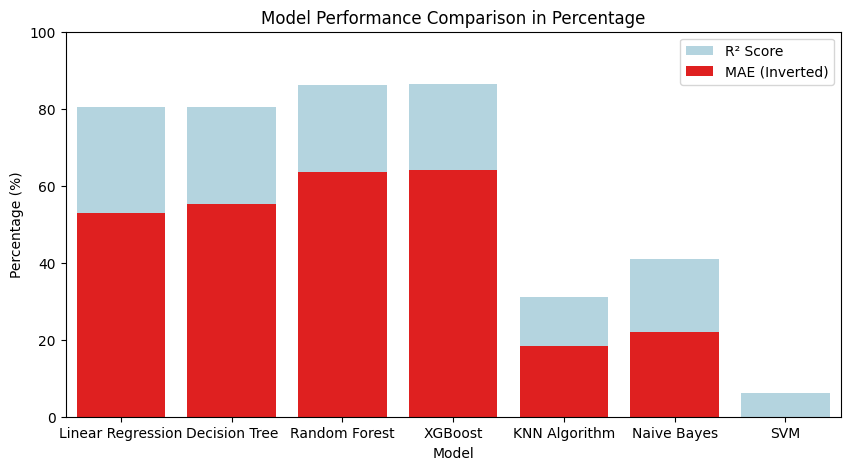

In [107]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="R² Score (%)", data=data, color="lightblue", label="R² Score")
sns.barplot(x="Model", y="MAE (%)", data=data, color="red", label="MAE (Inverted)")

plt.title("Model Performance Comparison in Percentage")
plt.ylabel("Percentage (%)")
plt.legend()
plt.ylim(0, 100)  # Set percentage limit
plt.show()